# Figure 4: Hammett Plot for pH = 1.0 ($\log{k_{H^+}}$ vs $\sigma$)

This workbook imports the data set of kinetic parameters for the rearrangement described in the paper below. It then generates a Hammett plot for the reaction indicated in the title.

The data being pklotted is from 'On the Rearrangement in Dioxane/Water of (*Z*)-Arylhydrazones of 5-Amino-3-benzoyl-1,2,4-oxadiazole into (2-Aryl-5-phenyl-2*H*-1,2,3-triazol-4-yl)ureas: Substituent Effects on the Different Reaction Pathways." F. D'Anna, V. Frenna, G. Macaluso, S. Marullo, S. Morganti, V. Pace, D. Spinelli, R. Spisani, C. Tavani, *J. Org. Chem.*, **2006**, *71*, 5616-5624. https://doi.org/10.1021/jo0605849

The data is found in tables within the supplementary material at https://ndownloader.figstatic.com/files/4775281


## Setup Tools and Read Data Table

The libraries are imported and any functions defined

In [6]:
##############################################################
### Set up libraries and global variables
##############################################################

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats
from scipy.optimize import curve_fit

github_location = "https://raw.githubusercontent.com/blinkletter/4410PythonNotebooks/main/Class_23/data/"
github_location = "./data/"
github_location_styles = "https://raw.githubusercontent.com/blinkletter/LFER-QSAR/main/styles/"
github_location_LFER_tables = "https://raw.githubusercontent.com/blinkletter/LFER-QSAR/main/data/"

result_file_name = "Table1data.csv"


## Read Data and make Plots

We now have a data set of kinetic parameters and substituent parameters.  We can plot the log of the rate constants *vs* the Hammett $\sigma$ values and draw conclusion based on the results.

In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats
from scipy.stats import linregress

def Report(comment, result):
    print(comment)
    print(f"slope = {result.slope:-.3f} +/- {result.stderr:.3f}")
    print(f"intercept = {result.intercept:-.3f} +/- {result.intercept_stderr:.3f}")
    print(f"rsq = {(result.rvalue)**2:-.3}")
    print(f"p = {(result.pvalue):-.3}")
    print("")


#Filename = github_location_LFER_tables + LFER_Data
Filename = github_location + result_file_name        ### Use when working file is being stored locally


df = pd.read_csv(Filename, 
                 delimiter = ",", 
                 skipinitialspace=True, 
                 index_col="Substituent", 
                 comment = "#") 

#display(df)

##################################################################################################################################
##################################################################################################################################
##################################################################################################################################


#################################################################
### a function to fill in sigma for empty spaces in s+ and s- ###
#################################################################
def fill_sigma(df):     
    for z in df.index:
        if np.isnan(df.loc[z,"s_plus"]):
            df.loc[z,"s_plus"] = df.loc[z,"sigma"]
        if np.isnan(df["s_minus"][z]):
            df.loc[z,"s_minus"] = df.loc[z,"sigma"]
    return(df)


################################################################################
### Read data set. The fields are separated by commas; comments are enabled  ###
################################################################################

#LFER_Data = "LFER_HanschLeoTaft.csv"   # Choose which set of Hammett parameters you prefer
LFER_Data = "LFER_Williams.csv"

Filename = github_location_LFER_tables + LFER_Data

df2 = pd.read_csv(Filename, 
                 delimiter = ",", 
                 skipinitialspace=True, 
                 index_col="Substituent", 
                 comment = "#") 
#display(df)

########################################################
### Fill across sigma values and select substituents ###
########################################################

df2 = fill_sigma(df2)
#display(df2)

###############################
### Remove unneeded columns ###
###############################
 
#df2.drop(labels = ["TABLE V", "TABLE I"],    #Trim "LFER_HanschLeoTaft.csv" data
df2.drop(labels = ["Page"],                   #Trim "LFER_Williams.csv"" data
        axis = 1,
        inplace = True)
#print(df2)
df2.sort_values(by=['sigma'], inplace=True)
#display(df2)
#display(df1)

result = pd.concat([df2, df], axis=1, join="inner")
display(result)

,sigma,s_plus,s_minus,Molecule,kAR_pS_11.5,kAR_pS_3.80,kAR_pS_1.0,kH,K
Substituent,,,,,,,,,
p-OCH3,-0.27,-0.78,-0.26,1c,0.00395,1.240000e-05,0.000422,0.002130,1.400
p-CH3,-0.14,-0.31,-0.17,1e,0.00467,1.190000e-05,0.000371,0.001880,1.340
m-CH3,-0.06,-0.06,-0.06,1d,0.00641,9.180000e-06,0.000316,0.001770,1.230
H,0.00,0.00,0.00,1b,0.00368,7.940000e-06,0.000286,0.001580,1.230
p-Cl,0.23,0.11,0.19,1g,0.01610,3.990000e-06,0.000119,0.000726,1.080
p-Br,0.23,0.15,0.25,1i,0.02000,3.440000e-06,0.000105,0.000652,1.060
m-Cl,0.37,0.37,0.37,1f,0.00269,2.710000e-06,0.000078,0.000533,0.976
m-Br,0.39,0.39,0.39,1h,0.03120,2.640000e-06,0.000075,0.000495,0.983
p-CN,0.66,0.66,0.88,1j,0.32100,9.500000e-07,0.000022,0.000155,0.880


kH
slope = -1.340 +/- 0.054
intercept = -0.103 +/- 0.025
rsq = 0.985
p = 1.39e-09



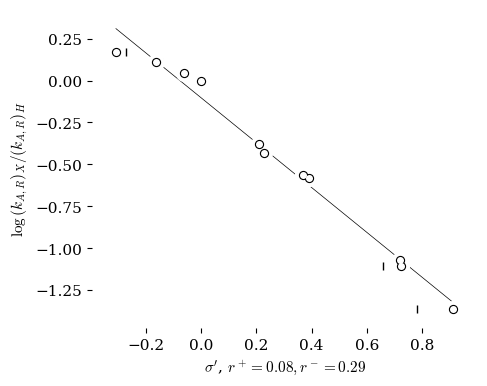

In [24]:
df = result.copy()

sigmatype = "s_minus"   # "sigma", "s_plus", or "s_minus"
column = "kH"  # "Ka", "kOH", "kH2O", "kH"

r_plus = 0.08
r_minus = 0.29
#x = df[sigmatype]  
x = df["sigma"] + r_minus*(df["s_minus"]-df["sigma"]) + r_plus*(df["s_plus"]-df["sigma"])

y_H = df["kAR_pS_1.0"]["H"]
#print(y_H)
y = np.log10(df["kAR_pS_1.0"]/y_H)   # in this case we are using kH/Ka since they depend upon each other.



style = "tufte.mplstyle"
#style = "S2_classic2.mplstyle"
style_name = github_location_styles + style
plt.style.use(style_name)

fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(5,4))  
ax.margins(x=.07, y=.07, tight=True)


if sigmatype == "s_plus":
    x_label = r"$\sigma^+$"
elif sigmatype == "s_minus":
    x_label = r"$\sigma^-$"
elif sigmatype == "sigma":
    x_label = r"$\sigma$"
else:
    x_label = "ERROR"

x_label = "$\sigma^\prime$, $r^+ = "+str(r_plus)+", r^- = "+str(r_minus)+"$"

ax.set(
#    title="Yukawa-Tsuno Plot",       
          ylabel=r"$\log{(k_{A,R})_X/(k_{A,R})_H}$", 
          xlabel=x_label,                
#          xlim=[-.9,.9],                  
#          ylim=[-3.7,-2.7]
         )


##############################

linfit = linregress(x,y)
fity = linfit.slope * x + linfit.intercept

ax.plot(x, fity, color='black', zorder=1, linewidth=0.5)

ax.scatter(x,y, s=128, color="white", marker='o', zorder=3)
ax.scatter(x,y, s=32, color="black", marker='o', zorder=3)
ax.scatter(x,y, s=16, color="white", marker='o', zorder=3)

ax.scatter(df["sigma"],y, color="black", marker='|', zorder=2)
#ax.scatter(df["s_minus"],y, color="black", marker='|', zorder=2)

Report(column, linfit)   # use the 'Report' function to output the line fit parameters

fig.savefig("plotIYK_Fig4+0.08+0.28.pdf")   # use this to save the figure in PDF format
plt.show()

kH
slope = -1.459 +/- 0.017
intercept = -0.031 +/- 0.008
rsq = 0.999
p = 1.78e-14



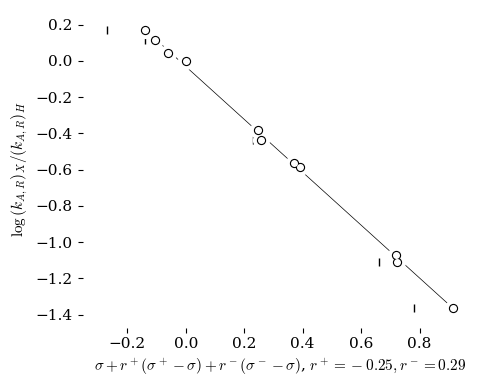

In [21]:
df = result.copy()

sigmatype = "s_minus"   # "sigma", "s_plus", or "s_minus"
column = "kH"  # "Ka", "kOH", "kH2O", "kH"

r_plus = -0.25
r_minus = 0.29
#x = df[sigmatype]  
x = df["sigma"] + r_minus*(df["s_minus"]-df["sigma"]) + r_plus*(df["s_plus"]-df["sigma"])

y_H = df["kAR_pS_1.0"]["H"]
#print(y_H)
y = np.log10(df["kAR_pS_1.0"]/y_H)   # in this case we are using kH/Ka since they depend upon each other.



style = "tufte.mplstyle"
#style = "S2_classic2.mplstyle"
style_name = github_location_styles + style
plt.style.use(style_name)

fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(5,4))  
ax.margins(x=.07, y=.07, tight=True)


if sigmatype == "s_plus":
    x_label = r"$\sigma^+$"
elif sigmatype == "s_minus":
    x_label = r"$\sigma^-$"
elif sigmatype == "sigma":
    x_label = r"$\sigma$"
else:
    x_label = "ERROR"

x_label = "$\sigma + r^+(\sigma^+ - \sigma) + r^-(\sigma^- - \sigma)$, $r^+ = "+str(r_plus)+", r^- = "+str(r_minus)+"$"

ax.set(
#    title="Yukawa-Tsuno Plot",       
          ylabel=r"$\log{(k_{A,R})_X/(k_{A,R})_H}$", 
          xlabel=x_label,                
#          xlim=[-.9,.9],                  
#          ylim=[-3.7,-2.7]
         )


##############################

linfit = linregress(x,y)
fity = linfit.slope * x + linfit.intercept

ax.plot(x, fity, color='black', zorder=1, linewidth=0.5)

ax.scatter(x,y, s=128, color="white", marker='o', zorder=3)
ax.scatter(x,y, s=32, color="black", marker='o', zorder=3)
ax.scatter(x,y, s=16, color="white", marker='o', zorder=3)

ax.scatter(df["sigma"],y, color="black", marker='|', zorder=2)
#ax.scatter(df["s_minus"],y, color="black", marker='|', zorder=2)

Report(column, linfit)   # use the 'Report' function to output the line fit parameters

fig.savefig("plotIYK_Fig4-0.25+0.29.pdf")   # use this to save the figure in PDF format
plt.show()

## Determine Yukawa-Tsuno *r*-Value

the code below uses the y-data and determines a set of $\sigma$ values based on blending $\sigma$ and $\sigma^-$ values using the Yukawa-Tsuno method.

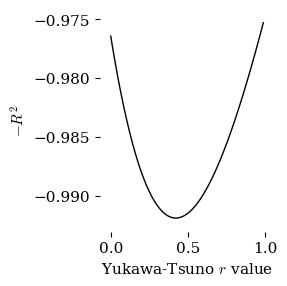

The optimal value for r is 0.422 for rsq = -0.99190


In [10]:
# YUKAWA-TSUNO DETERMINATION

from scipy.optimize import minimize_scalar

def RSQ_function(r):    # returns the RSQ for linefits using the given Yukawa-Tsuno r factor
    x = df["sigma"]+r*(df["s_minus"]-df["sigma"])
    linfit = linregress(x,y)    # y is the set of y values from above
    return -(linfit.rvalue**2)


##########################################################
### Calculate the value of -RSQ as the value of r is varied 
##########################################################

rsq_range=[]
r_range = np.arange(0,1,0.01)
for r in r_range:
    rsq = RSQ_function(r)
    rsq_range.append(rsq)

##########################################################
### Plot the value of -RSQ as the value of r is varied 
##########################################################

style_file = "tufte.mplstyle"
#style_file = "S2_classic2.mplstyle"
plt.style.use(github_location_styles + style_file)        

fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(3,3))  
ax.margins(x=.07, y=.07, tight=True)      # add 7% empty space around outside of plot area   
ax.set(ylabel=r"$-R^2$", 
       xlabel=r"Yukawa-Tsuno $r$ value")

ax.plot(r_range,rsq_range)

fig.savefig("plotIYK_Fig4_r.pdf")   # use this to save the figure in PDF format
plt.show()

##################################################
### Determine optimal r value to minimize -RSQ 
##################################################

r_opt = minimize_scalar(RSQ_function)
print(f"The optimal value for r is {r_opt['x']:0.3f} for rsq = {r_opt['fun']:0.5f}")

The optimal value for r+ is -0.263 and for r- is 0.318 for rsq = -0.99892


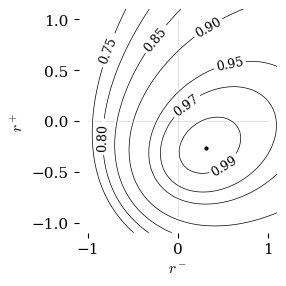

In [11]:
# INGOLD-YUKAWA-TSUNO DETERMINATION

from scipy.optimize import minimize

def RSQ_function(params):    # returns the RSQ for linefits using the given Yukawa-Tsuno r factor
    r_minus, r_plus = params
    x = df["sigma"] + r_minus*(df["s_minus"]-df["sigma"]) + r_plus*(df["s_plus"]-df["sigma"])
    linfit = linregress(x,y)    # y is the set of y values from above
    return -(linfit.rvalue**2)



##################################################
### Determine optimal r value to minimize -RSQ 
##################################################

r_opt = minimize(RSQ_function, [0.20,-0.20])
#print(r_opt)
r_minus, r_plus = r_opt['x']
print(f"The optimal value for r+ is {r_plus:0.3f} and for r- is {r_minus:0.3f} for rsq = {r_opt['fun']:0.5f}")



######### CONTOUR PLOT #############

rpluslist = np.linspace(-1.1,1.1,50)
rminuslist = rpluslist.copy()


l1 = []
for rplus in rpluslist:
    l2 = []
    for rminus in rminuslist:
        rsq = RSQ_function([rminus,rplus])    
        l2.append(rsq)
    l1.append(l2)
l3 = np.matrix(l1)
#print(l3)

X, Y = np.meshgrid(rpluslist, rminuslist)

levels = [0.75, 0.80, 0.85, 0.90, 0.95, 0.97, 0.99]


style = "tufte.mplstyle"
#style = "S2_classic2.mplstyle"
style_name = github_location_styles + style
plt.style.use(style_name)

fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(3,3))  
ax.margins(x=.07, y=.07, tight=True)



ax.hlines(0,-1,1, color = "lightgray", zorder = 1, linewidths=0.5)
ax.vlines(0,-1,1, color = "lightgray", zorder = 1, linewidths=0.5)

ax.contour(X, Y, -l3, levels, colors = "white", linewidths=3, zorder = 2)
CS = ax.contour(X, Y, -l3, levels, colors = "black", linewidths=0.5, zorder = 2)
ax.clabel(CS, inline=True, fontsize=9)
#ax.plot(r_minus,r_plus,"o", color="white", markeredgecolor = "black", markeredgewidth = 0.5, markersize = 3)
ax.plot(r_minus,r_plus,"o", color="black", markersize = 2)
#np.argmin(l3, axis=0)


ax.set(
#    title="Yukawa-Tsuno Plot",       
          ylabel=r"$r^+$", 
          xlabel=r"$r^-$",                
#          xlim=[-.9,.9],                  
#          ylim=[-3.7,-2.7]
         )


fig.savefig("plotIYK_Fig4_r+r-_opt.pdf")   # use this to save the figure in PDF format

plt.show()

0.000286
kH
slope = -1.324 +/- 0.040
intercept = -0.088 +/- 0.019
rsq = 0.992
p = 1.01e-10



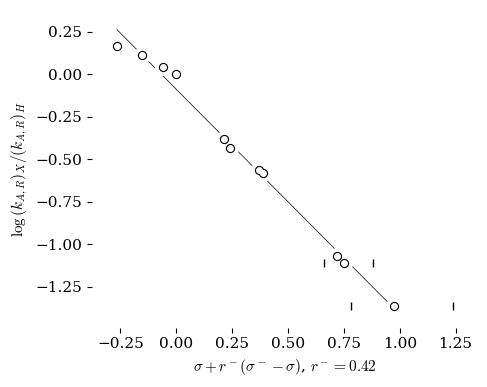

In [12]:
df = result.copy()

sigmatype = "s_minus"   # "sigma", "s_plus", or "s_minus"
column = "kH"  # "Ka", "kOH", "kH2O", "kH"

#r_plus = 0
r_minus = 0.42
#x = df[sigmatype]  
x = df["sigma"]+r_minus*(df["s_minus"]-df["sigma"])

y_H = df["kAR_pS_1.0"]["H"]
print(y_H)
y = np.log10(df["kAR_pS_1.0"]/y_H)   # in this case we are using kH/Ka since they depend upon each other.



style = "tufte.mplstyle"
#style = "S2_classic2.mplstyle"
style_name = github_location_styles + style
plt.style.use(style_name)

fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(5,4))  
ax.margins(x=.07, y=.07, tight=True)


if sigmatype == "s_plus":
    x_label = r"$\sigma^+$"
elif sigmatype == "s_minus":
    x_label = r"$\sigma^-$"
elif sigmatype == "sigma":
    x_label = r"$\sigma$"
else:
    x_label = "ERROR"

x_label = "$\sigma + r^-(\sigma^- - \sigma)$, $r^- = "+str(r_minus)+"$"

ax.set(
#    title="Yukawa-Tsuno Plot",       
          ylabel=r"$\log{(k_{A,R})_X/(k_{A,R})_H}$", 
          xlabel=x_label,                
#          xlim=[-.9,.9],                  
#          ylim=[-3.7,-2.7]
         )


##############################

linfit = linregress(x,y)
fity = linfit.slope * x + linfit.intercept

ax.plot(x, fity, color='black', zorder=1, linewidth=0.5)

ax.scatter(x,y, s=128, color="white", marker='o', zorder=3)
ax.scatter(x,y, s=32, color="black", marker='o', zorder=3)
ax.scatter(x,y, s=16, color="white", marker='o', zorder=3)

ax.scatter(df["sigma"],y, color="black", marker='|', zorder=2)
ax.scatter(df["s_minus"],y, color="black", marker='|', zorder=2)

Report(column, linfit)   # use the 'Report' function to output the line fit parameters

fig.savefig("plotYK_Fig4.pdf")   # use this to save the figure in PDF format
plt.show()

Substituent
p-OCH3    0.168946
p-CH3     0.113008
m-CH3     0.043321
H         0.000000
p-Cl     -0.380819
p-Br     -0.435177
m-Cl     -0.562604
m-Br     -0.583627
p-CN     -1.110013
m-NO2    -1.070760
p-NO2    -1.362944
Name: kAR_pS_1.0, dtype: float64
kAR pH 1.0
slope = -1.452 +/- 0.029
intercept = -0.022 +/- 0.012
rsq = 0.999
p = 1.69e-05



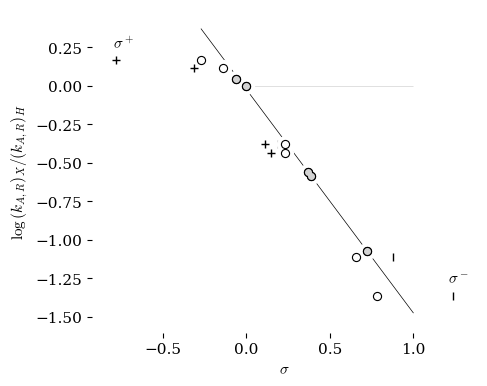

In [48]:
### PLAIN HAMMETT PLOT


df = result.copy()

sigmatype = "sigma"   # "sigma", "s_plus", or "s_minus"

x = df[sigmatype]
#x_line = np.linspace(np.min(x), np.max(x), 10)
x_line = np.linspace(np.min(x), 1.0, 10)

y_H = df["kAR_pS_1.0"]["H"]
#print(y_H)
y = np.log10(df["kAR_pS_1.0"]/y_H)   



style = "tufte.mplstyle"
#style = "S2_classic2.mplstyle"
style_name = github_location_styles + style
plt.style.use(style_name)

fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(5,4))  
ax.margins(x=.07, y=.07, tight=True)


if sigmatype == "s_plus":
    x_label = r"$\sigma^+$"
elif sigmatype == "s_minus":
    x_label = r"$\sigma^-$"
elif sigmatype == "sigma":
    x_label = r"$\sigma$"
else:
    x_label = "ERROR"

x_label = "$\sigma$"

ax.set(
#    title="Yukawa-Tsuno Plot",       
          ylabel=r"$\log{(k_{A,R})_X/(k_{A,R})_H}$", 
          xlabel=x_label,                
#          xlim=[-.9,.9],                  
#          ylim=[-3.7,-2.7]
         )


meta = df.loc[["m-CH3", "m-Cl", "m-Br", "m-NO2", "H"]]
#print(meta)
x_meta = meta["sigma"]
y_meta = np.log10(meta["kAR_pS_1.0"]/y_H)

ax.scatter(x,y, s=128, color="white", marker='o', zorder=1)
ax.scatter(x,y, s=32, color="black", marker='o', zorder=3)
ax.scatter(x,y, s=16, color="white", marker='o', zorder=3)

ax.scatter(x_meta,y_meta, s=128, color="white", marker='o', zorder=1)
ax.scatter(x_meta,y_meta, s=32, color="black", marker='o', zorder=3)
ax.scatter(x_meta,y_meta, s=16, color="lightgray", marker='o', zorder=3)

#ax.scatter(df["sigma"],y, color="black", marker='|', zorder=2)
ax.scatter(df["s_minus"],y, color="black", marker='|', zorder=0)
ax.scatter(df["s_plus"],y, color="black", marker='+', zorder=2)

ax.text(-0.80,0.25,"$\sigma^+$")
ax.text(1.21,-1.28,"$\sigma^-$")

##############################
linfit = linregress(x_meta,y_meta)

fity = linfit.slope * x_line + linfit.intercept

ax.plot(x_line, fity, color='black', zorder=0, linewidth=0.5)

ax.hlines(0,0,1, color='lightgray', zorder=0, linewidth=0.5)
print(y)

Report("kAR pH 1.0", linfit)   # use the 'Report' function to output the line fit parameters

fig.savefig("plot_Hammett_Fig13.pdf")   # use this to save the figure in PDF format
plt.show()

In [ ]:
df

,sigma,s_plus,s_minus,Molecule,kAR_pS_11.5,kAR_pS_3.80,kAR_pS_1.0,kH,Ka,pKa
Substituent,,,,,,,,,,
p-OCH3,-0.27,-0.78,-0.26,1c,0.00395,1.240000e-05,0.000422,0.002130,1.400,-0.15
p-CH3,-0.14,-0.31,-0.17,1e,0.00467,1.190000e-05,0.000371,0.001880,1.340,-0.13
m-CH3,-0.06,-0.06,-0.06,1d,0.00641,9.180000e-06,0.000316,0.001770,1.230,-0.09
H,0.00,0.00,0.00,1b,0.00368,7.940000e-06,0.000286,0.001580,1.230,-0.09
p-Cl,0.23,0.11,0.19,1g,0.01610,3.990000e-06,0.000119,0.000726,1.080,-0.03
p-Br,0.23,0.15,0.25,1i,0.02000,3.440000e-06,0.000105,0.000652,1.060,-0.03
m-Cl,0.37,0.37,0.37,1f,0.00269,2.710000e-06,0.000078,0.000533,0.976,0.01
m-Br,0.39,0.39,0.39,1h,0.03120,2.640000e-06,0.000075,0.000495,0.983,0.01
p-CN,0.66,0.66,0.88,1j,0.32100,9.500000e-07,0.000022,0.000155,0.880,0.06


In [ ]:
meta = df.loc[["m-CH3", "m-Cl", "m-Br", "m-NO2", "H"]]

,sigma,s_plus,s_minus,Molecule,kAR_pS_11.5,kAR_pS_3.80,kAR_pS_1.0,kH,Ka,pKa
Substituent,,,,,,,,,,
m-CH3,-0.06,-0.06,-0.06,1d,0.00641,9.180000e-06,0.000316,0.001770,1.230,-0.09
m-Cl,0.37,0.37,0.37,1f,0.00269,2.710000e-06,0.000078,0.000533,0.976,0.01
m-Br,0.39,0.39,0.39,1h,0.03120,2.640000e-06,0.000075,0.000495,0.983,0.01
m-NO2,0.72,0.72,0.72,1k,0.15800,9.950000e-07,0.000024,0.000180,0.868,0.06
H,0.00,0.00,0.00,1b,0.00368,7.940000e-06,0.000286,0.001580,1.230,-0.09
